#Análisis Exploratorio de Datos (EDA)
##En esta sección analizamos la edad, ingresos y comportamiento de los clientes respecto al churn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#cargar dataset
df = pd.read_csv('df_clientes.csv')

In [6]:
#vista rápida del dataset
print(df.head())
print()
print (df.describe())
print()
print(df.isnull().sum())

   CustomerID  Edad Género  Ingresos  Meses_como_cliente  Churn
0           1    25      F      1500                   3      1
1           2    45      M      3000                  24      0
2           3    23      F      1200                   2      1
3           4    36      M      2500                  18      0
4           5    52      F      4000                  36      0

       CustomerID       Edad     Ingresos  Meses_como_cliente      Churn
count    20.00000  20.000000    20.000000           20.000000  20.000000
mean     10.50000  37.950000  2765.000000           20.350000   0.300000
std       5.91608  11.518749  1172.615161           15.708781   0.470162
min       1.00000  21.000000  1000.000000            1.000000   0.000000
25%       5.75000  27.500000  1675.000000            5.750000   0.000000
50%      10.50000  38.500000  2800.000000           18.500000   0.000000
75%      15.25000  45.500000  3625.000000           27.750000   1.000000
max      20.00000  60.000000  4

In [15]:
#eliminar duplicados

df = df.drop_duplicates()

#creamos nueva columna para los ingresos

def clasificar_ingresos(x):
  if x < 2000:
    return 'Bajo'
  elif x <= 4000:
    return 'Medio'
  else:
    return 'Alto'

df['Nivel_Ingresos'] = df['Ingresos'].apply(clasificar_ingresos)

#edad media por nivel deingresos
print(df.groupby('Nivel_Ingresos')['Edad'].mean())

#ordenar por meses como cliente
df = df.sort_values(by='Meses_como_cliente', ascending = False)
print(df.head)

Nivel_Ingresos
Alto     53.000000
Bajo     24.166667
Medio    40.200000
Name: Edad, dtype: float64
<bound method NDFrame.head of     CustomerID  Edad Género  Ingresos  Meses_como_cliente  Churn  \
19          20    60      F      4700                  50      0   
18          19    55      M      4500                  48      0   
9           10    50      M      4300                  42      0   
8            9    47      F      4100                  40      0   
4            5    52      F      4000                  36      0   
14          15    44      M      3200                  25      0   
1            2    45      M      3000                  24      0   
5            6    41      M      3500                  22      0   
10          11    39      M      3000                  20      0   
16          17    40      F      2600                  19      0   
3            4    36      M      2500                  18      0   
15          16    38      M      2900                  

In [17]:
!pip install seaborn

In [18]:
import seaborn as sns

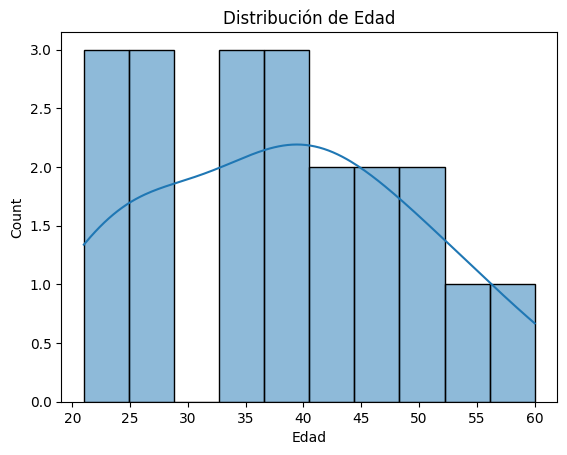

In [19]:
#ver si los clientes son mas jóvenes o mayores
sns.histplot(data=df, x='Edad', bins=10, kde=True)
plt.title('Distribución de Edad')
plt.show()


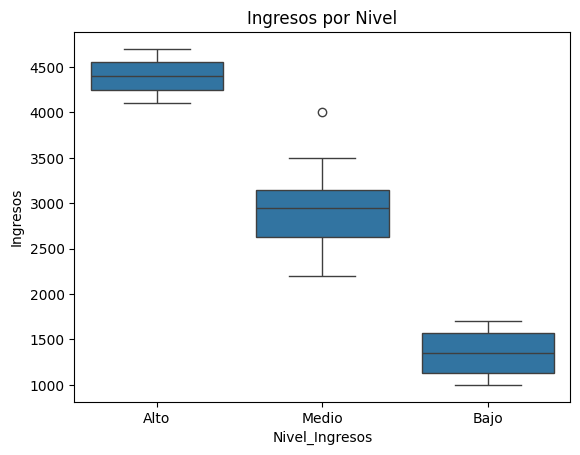

In [20]:
#comprobar ingresos y nivel de ingresos
sns.boxplot(data=df, x='Nivel_Ingresos', y='Ingresos')
plt.title('Ingresos por Nivel')
plt.show()

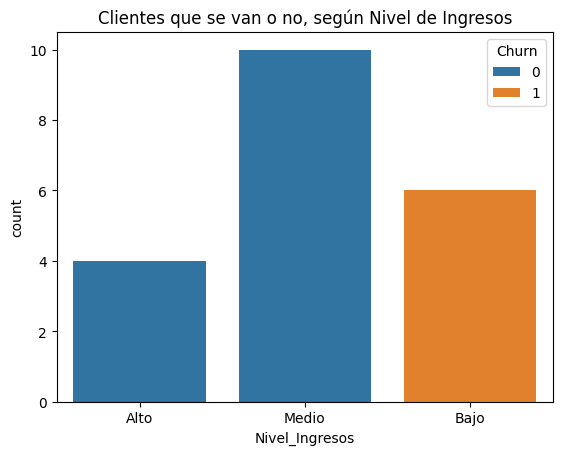

In [21]:
#Gráfico de barras del Churn por Nivel de Ingresos

sns.countplot(data=df, x='Nivel_Ingresos', hue='Churn')
plt.title('Clientes que se van o no, según Nivel de Ingresos')
plt.show()


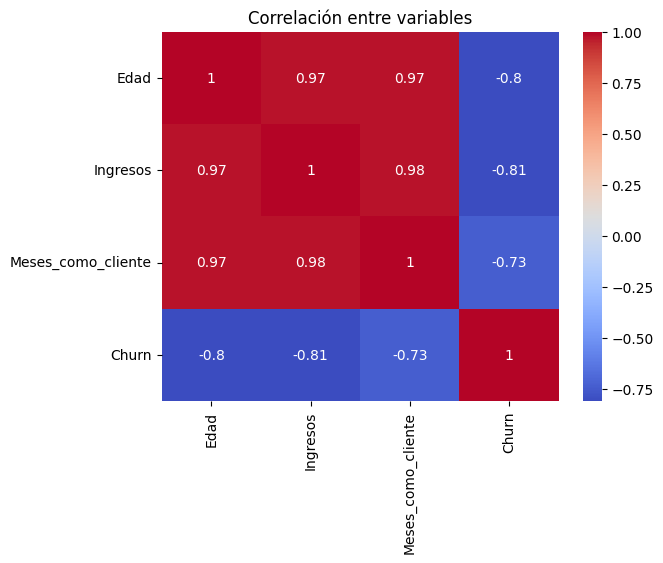

In [22]:
#Heatmap de correlación

corr = df[['Edad', 'Ingresos', 'Meses_como_cliente', 'Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()


In [23]:
# Variables predictoras (X) y variable objetivo (y)
X = df[['Edad', 'Ingresos', 'Meses_como_cliente']]
y = df['Churn']

In [24]:
#entrenamos el modelo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
#árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [27]:
#primero predecimos en test
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Matriz de confusión:
[[4 0]
 [0 2]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [28]:
from sklearn import tree

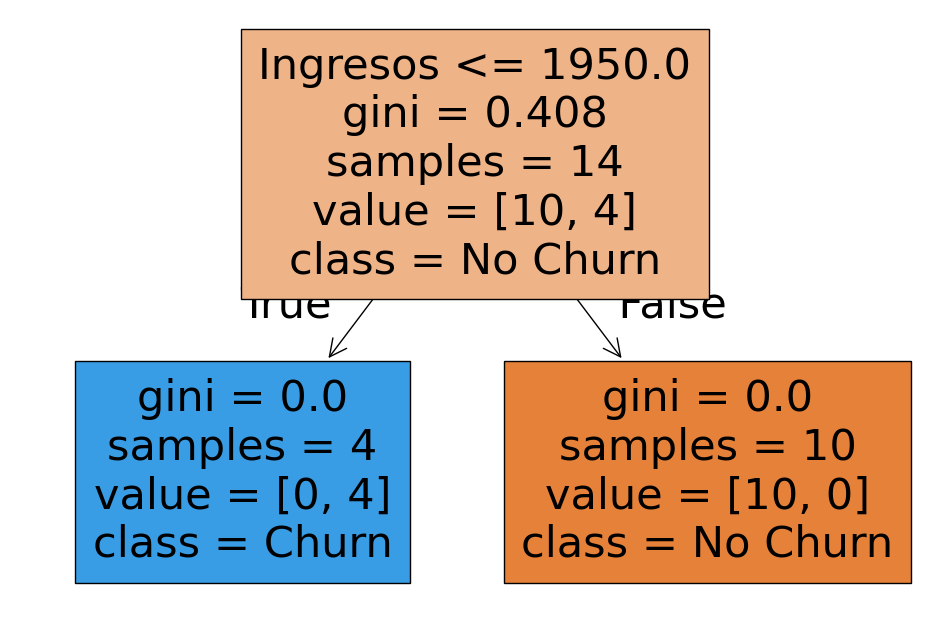

In [29]:
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=['Edad', 'Ingresos', 'Meses_como_cliente'],
               class_names=['No Churn', 'Churn'], filled=True)
plt.show()

In [30]:
nuevo_cliente = pd.DataFrame({
    'Edad': [30],
    'Ingresos': [1800],
    'Meses_como_cliente': [3]
})

In [31]:
prediccion = model.predict(nuevo_cliente)
print("¿Se irá? (1 = Sí, 0 = No):", prediccion[0])

¿Se irá? (1 = Sí, 0 = No): 1
